In [102]:
# pre processing 
import re 
import pandas as pd 
import matplotlib.pyplot as plt

In [103]:
#  open the txt file and read it 
f = open('chat.txt' , 'r'  ,encoding='utf-8')
data = f.read()


In [104]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [105]:
messages = re.split(pattern , data)[1:]
# extracting dataes from 
dates = re.findall(pattern , data)


# converting to data frame 
df = pd.DataFrame({'user_msg': messages, 'msg_date': dates})
df['msg_date'] =  pd.to_datetime(df['msg_date'], format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'msg_date' : 'date'}, inplace=True)
df






,user_msg,date
0,Mαyukh: Ab ek lavde ko iss class material bhi ...,2022-01-15 11:54:00
1,Sudeeven: Kon😂\n,2022-01-15 11:54:00
2,Mαyukh: Priya malhotra 🤣🤣\n,2022-01-15 11:54:00
3,+91 93658 46549: 🤣🤣\n,2022-01-15 11:54:00
4,Aditi: This message was deleted\n,2022-01-15 11:54:00
...,...,...
39994,Sudeeven: 📌 *Placement Opportunities*\n\nWelco...,2023-05-11 17:58:00
39995,Lakshmi Sahithi: *Greetings students!!*\n\nAca...,2023-05-21 12:01:00
39996,+91 78932 71623: *Greetings students!!*\n\nAca...,2023-05-21 12:07:00
39997,Om Jaiswal: Follow this link to join my WhatsA...,2023-05-21 13:19:00


In [106]:
#   separate messages from users
users = []
new_messages = []
for message in df['user_msg']:
   entry = re.split('([\w\W]+?):\s', message)
   
   if entry[1:]:  # user name
        users.append(entry[1])
        new_messages.append(entry[2])
   else:
        users.append('group_notification')
        new_messages.append(entry[0])

df['user'] = users
df['message'] = new_messages
df.drop(columns=['user_msg'], inplace=True)
df.head()
            


,date,user,message
0,2022-01-15 11:54:00,Mαyukh,Ab ek lavde ko iss class material bhi chahiye ...
1,2022-01-15 11:54:00,Sudeeven,Kon😂\n
2,2022-01-15 11:54:00,Mαyukh,Priya malhotra 🤣🤣\n
3,2022-01-15 11:54:00,+91 93658 46549,🤣🤣\n
4,2022-01-15 11:54:00,Aditi,This message was deleted\n


In [107]:
df['year'] = df['date'].dt.year
df['month']= df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-01-15 11:54:00,Mαyukh,Ab ek lavde ko iss class material bhi chahiye ...,2022,January,15,11,54
1,2022-01-15 11:54:00,Sudeeven,Kon😂\n,2022,January,15,11,54
2,2022-01-15 11:54:00,Mαyukh,Priya malhotra 🤣🤣\n,2022,January,15,11,54
3,2022-01-15 11:54:00,+91 93658 46549,🤣🤣\n,2022,January,15,11,54
4,2022-01-15 11:54:00,Aditi,This message was deleted\n,2022,January,15,11,54


In [108]:
words =[]
new_df = df[df['user'] == 'Aditi']
new_df
# for i in new_df['message']:
#     words.extend(i.split())

# words  

,date,user,message,year,month,day,hour,minute
4,2022-01-15 11:54:00,Aditi,This message was deleted\n,2022,January,15,11,54
11,2022-01-15 11:56:00,Aditi,+++\n,2022,January,15,11,56
218,2022-01-17 08:21:00,Aditi,Happy Birthday @917363965813 🎂🥳🥳🎉🎉\n,2022,January,17,8,21
226,2022-01-17 08:25:00,Aditi,<Media omitted>\n,2022,January,17,8,25
2186,2022-01-23 12:38:00,Aditi,No\n,2022,January,23,12,38
...,...,...,...,...,...,...,...,...
39537,2023-04-16 19:39:00,Aditi,Dean ko mail krte hai sab milke 😂\n,2023,April,16,19,39
39540,2023-04-16 19:40:00,Aditi,Tu aur main krne se nhi hoga sabko krna padhega\n,2023,April,16,19,40
39552,2023-04-16 19:48:00,Aditi,Are yeh sab kyun krna hai yeh notice ka refere...,2023,April,16,19,48
39554,2023-04-16 19:48:00,Aditi,Central govt k clg mein padhte hai to kya huml...,2023,April,16,19,48


In [109]:
p_df = round((df['user'].value_counts()/df.shape[0])*100).reset_index()
p_df.rename( columns ={'user':'Name', 'count' : 'percentage'})

,Name,percentage
0,Sudeeven,11.0
1,Ramasish,7.0
2,Mαyukh,7.0
3,ABHISHEK,7.0
4,+91 81015 99360,6.0
...,...,...
97,+91 93816 88328,0.0
98,Girrish,0.0
99,Piyush,0.0
100,+91 85228 19247,0.0


In [110]:
#  time line analysis
df['month_num']= df['date'].dt.month
timeline = df.groupby(['year' , 'month']).count()['message'].reset_index()



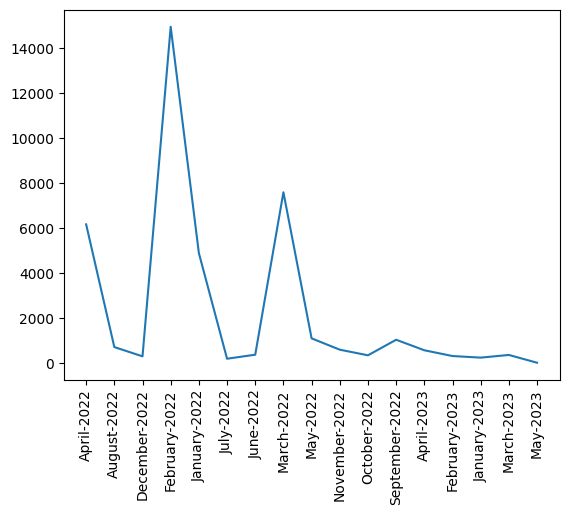

In [111]:
time = []
for i in range (timeline.shape[0]):
     time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
     
timeline['time'] = time
timeline


# plot 
plt.plot(timeline['time'] , timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [112]:
df['day_name']= df['date'].dt.day_name()

df['day_name'].value_counts()

day_name
Thursday     10464
Friday        6791
Tuesday       5781
Monday        5660
Sunday        4592
Wednesday     4190
Saturday      2521
Name: count, dtype: int64

In [128]:
df['only_date'] = df['date'].dt.date
df.head(1)
dealy_tiumeline= df.groupby('only_date').count()['message'].reset_index()
dealy_tiumeline['only_date']
#
#


0      2022-01-15
1      2022-01-16
2      2022-01-17
3      2022-01-18
4      2022-01-19
          ...    
342    2023-05-02
343    2023-05-03
344    2023-05-09
345    2023-05-11
346    2023-05-21
Name: only_date, Length: 347, dtype: object